### 데이터
- 07_연령별 소년범죄 비율_김현화_1: 연령별 소년 범죄자 수
  - 사이트: https://www.crimestats.or.kr/portal/stat/easyStatPage.do  
  - 통계표 이름: 「범죄분석」DB 범죄자 연령  
  - 일괄설정  
    - 항목: 소년  
    - 분류: 전체  
    - 검색기간: 2019년  

- 07_연령별 소년범죄 비율_김현화_2: 연령별 소년 인구 수
  - 사이트: https://kosis.kr/search/search.do 
  - 통계표 이름: 주민등록인구현황:행정구역(시군구)별/1세별 주민등록인구
  - 일괄설정  
    - 항목: 총인구수 
    - 행정구역: 전국
    - 연령별: 전체  
    - 시점: 2019년  
    
- 07_연령별 소년범죄 비율_김현화_3: 연령별 범죄자 수
  - 사이트: https://kosis.kr/search/search.do 
  - 통계표 이름: 범죄자 연령
  - 일괄설정  
    - 항목: 전체 
    - 범죄별: 합계
    - 연령별: 전체
    - 시점: 2006년~2019년  
    
- 07_연령별 소년범죄 비율_김현화_4: 10세~13세 인구 수
  - 사이트: https://kosis.kr/search/search.do 
  - 통계표 이름: 주민등록인구현황:행정구역(시군구)별/1세별 주민등록인구
  - 일괄설정  
    - 항목: 총인구수 
    - 행정구역: 전국
    - 연령별: 10세~13세
    - 시점: 2010년~2019년
    
- 07_연령별 소년범죄 비율_김현화_5: 2010년~2019년 촉법소년 수
  - 사이트: https://www.scourt.go.kr/portal/justicesta/JusticestaListAction.work?gubun=10
  - 통계표 이름: 2019년 사건추이(누년비교) > 3. 소년보호사건 접수구분별 누년비교표

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fm = mp.font_manager.FontManager()         # 한글화
plt.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False # '-' 에러 방지

In [3]:
# 데이터 불러오기
df1 = pd.read_csv('Data/07_연령별 소년범죄 비율_김현화_1.csv', sep = ',', thousands = ',') # 2019년 연령별 소년 범죄자 수
df2 = pd.read_csv('Data/07_연령별 소년범죄 비율_김현화_2.csv') # 2019년 연령별 소년 인구 수
df3 = pd.read_csv('Data/07_연령별 소년범죄 비율_김현화_3.csv', encoding='UTF8') # 2006년~2019년 연령별 범죄자 수
df4 = pd.read_csv('Data/07_연령별 소년범죄 비율_김현화_4.csv', encoding='UTF8') # 2010년~2019년 10세~13세 인구 수
df5 = pd.read_csv('Data/07_연령별 소년범죄 비율_김현화_5.csv', thousands = ',') # 2010년~2019년 촉법소년 수
df1.head()

,No,자료시점,분류,분류.1,분류.2,소년(소계),14세미만,14세,15세,16세,17세,18세
0,1,2019년,계,계[입력치],계[입력치],66247.0,NaN,9053.0,11730.0,13548.0,14338.0,17578.0
1,2,2019년,형법범,형법범계[입력치],형법범계[입력치],54497.0,NaN,8322.0,10399.0,11105.0,11090.0,13581.0
2,3,2019년,형법범,재산범죄,재산범죄의 계[입력치],27809.0,NaN,5077.0,5802.0,6202.0,5274.0,5454.0
3,4,2019년,형법범,재산범죄,배임,1.0,NaN,0.0,0.0,0.0,0.0,1.0
4,5,2019년,형법범,재산범죄,사기,8088.0,NaN,609.0,1023.0,1762.0,2044.0,2650.0


In [4]:
# 필요없는 컬럼 제거
df1 = df1.drop(['No','자료시점','분류','분류.1','14세미만'], axis=1).copy()
df1.head()

,분류.2,소년(소계),14세,15세,16세,17세,18세
0,계[입력치],66247.0,9053.0,11730.0,13548.0,14338.0,17578.0
1,형법범계[입력치],54497.0,8322.0,10399.0,11105.0,11090.0,13581.0
2,재산범죄의 계[입력치],27809.0,5077.0,5802.0,6202.0,5274.0,5454.0
3,배임,1.0,0.0,0.0,0.0,0.0,1.0
4,사기,8088.0,609.0,1023.0,1762.0,2044.0,2650.0


In [5]:
# 컬럼명 변경
df1.rename(columns={'분류.2':'범죄유형', '소년(소계)':'소계'}, inplace=True)

In [6]:
df1.isnull().sum()

범죄유형    0
소계      1
14세     1
15세     1
16세     1
17세     1
18세     1
dtype: int64

In [7]:
df1 = df1.dropna() # 결측치 제거

In [8]:
# 연령별 계만 추출
df1_sum = df1.loc[[0], :] # []안의 행 자리에 선택할 행의 index list, 열자리에 ':'
df1_sum

,범죄유형,소계,14세,15세,16세,17세,18세
0,계[입력치],66247.0,9053.0,11730.0,13548.0,14338.0,17578.0


In [9]:
df1_sum.iloc[0,1]

66247.0

### 시각화하기

### 1. 연령별 소년범죄 비율 (18세>17세>16세>15세>14세)

### (1) 연령별 소년범죄자 수

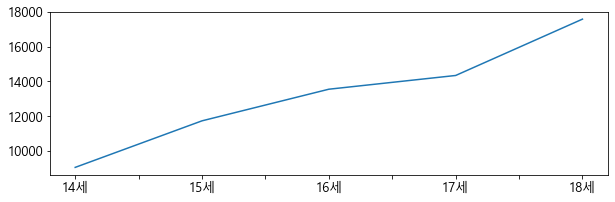

In [10]:
# 차트 크기 설정
plt.rcParams["figure.figsize"] = (14,8)
# 폰트 크기 설정
plt.rcParams["font.size"] = 13

# 선 그래프
df1_sum.iloc[0][2:].plot(kind='line', rot=0, figsize=(10, 3))
plt.show()

### (2) 연령별 소년범죄자 비율

In [11]:
df1_sum

,범죄유형,소계,14세,15세,16세,17세,18세
0,계[입력치],66247.0,9053.0,11730.0,13548.0,14338.0,17578.0


In [12]:
# 연령별 소년범죄 비율 리스트화

sum = df1_sum.iloc[0, 1]

ratio = []

for i in df1_sum.iloc[0][2:]:
    ratio.append(i/sum*100)
    
print(ratio)

[13.665524476580071, 17.706462179419447, 20.450737391881894, 21.64324422237988, 26.534031729738704]


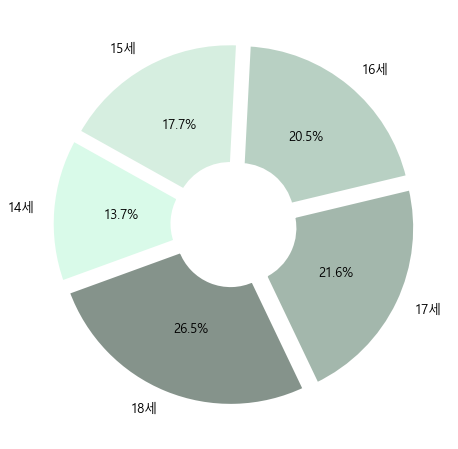

In [13]:
# 파이 그래프
# plt.pie(데이터, 라벨, autopct(전체대비비율)=소수점표시, startangle(부채꼴 시작 각도), shadow(그림자 효과 유무), explode(돌출))

labels = df1_sum.columns[2:].tolist() # 컬럼명 리스트로 추출
explode = [0.05, 0.05, 0.05, 0.05, 0.05]
# colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6'] # 다홍, 노랑, 민트, 연보라, 하늘색
colors = ['#D9FAE9', '#D6EEE0', '#B8D0C3', '#A3B7AC', '#85938B'] # 그라데이션
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# wedgeprops: 부채꼴 영역의 스타일 설정
# width’: 도넛 모양의 그래프에서 중심부의 크기
#'edgecolor’:각 조각의 테두리 색
#'linewidth’: 각 조각의 테두리 두께


plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=200, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

### (3) 연령별 소년 인구수 대비 소년 범죄자 비율

In [14]:
df2.head()

,행정구역(시군구)별,연령별,2019
0,행정구역(시군구)별,연령별,총인구수 (명)
1,전국,계,51849861
2,전국,0세,295132
3,전국,1세,330970
4,전국,2세,362900


In [15]:
# 필요없는 컬럼 삭제
df2 = df2.drop(['행정구역(시군구)별'], axis=1)
# 필요없는 행 삭제
df2 = df2.drop(0)
# 컬럼명 변경
df2.columns = ['연령', '인구 수']
df2

,연령,인구 수
1,계,51849861
2,0세,295132
3,1세,330970
4,2세,362900
5,3세,412018
...,...,...
98,96세,12811
99,97세,9225
100,98세,5993
101,99세,4274


In [16]:
# 14~18세 인구 수 추출
df2_juvenile = df2.iloc[15:20, :]
df2_juvenile

,연령,인구 수
16,14세,436418
17,15세,474123
18,16세,493389
19,17세,494523
20,18세,558704


In [17]:
# 14세~18세 범죄자 수
df1_sum_T = df1_sum.T
df1_sum_T

,0
범죄유형,계[입력치]
소계,66247.0
14세,9053.0
15세,11730.0
16세,13548.0
17세,14338.0
18세,17578.0


In [18]:
# 인덱스 초기화
df1_sum_T.reset_index(drop=False, inplace=True)
df1_sum_T

,index,0
0,범죄유형,계[입력치]
1,소계,66247.0
2,14세,9053.0
3,15세,11730.0
4,16세,13548.0
5,17세,14338.0
6,18세,17578.0


In [19]:
# 필요없는 행 삭제
df2_juvenile_crime = df1_sum_T.drop([0, 1])
df2_juvenile_crime

,index,0
2,14세,9053.0
3,15세,11730.0
4,16세,13548.0
5,17세,14338.0
6,18세,17578.0


In [20]:
# 컬럼명 변경
df2_juvenile_crime.columns = ['연령', '범죄자 수']
df2_juvenile_crime

,연령,범죄자 수
2,14세,9053.0
3,15세,11730.0
4,16세,13548.0
5,17세,14338.0
6,18세,17578.0


In [21]:
# df_merge_col = pd.merge(df_row, df3, on='id')
df_merge = pd.merge(df2_juvenile, df2_juvenile_crime, on='연령')
df_merge

,연령,인구 수,범죄자 수
0,14세,436418,9053.0
1,15세,474123,11730.0
2,16세,493389,13548.0
3,17세,494523,14338.0
4,18세,558704,17578.0


In [22]:
# '연령'을 인덱스로 설정
df_merge.set_index("연령", inplace = True)
# 데이터 타입 변경
df_merge = df_merge.apply(pd.to_numeric)

In [23]:
# 컬럼끼리 연산하여 비율 컬럼 추가
# x는 df_re를 입력변수(매개변수)로 받음, axis = 1은 열 방향으로 컬럼의 연산을 적용하라는 의미 
df_merge['비율'] = df_merge.apply(lambda x: x['범죄자 수']/x['인구 수']*100, axis=1).round(1).copy()
df_merge

,인구 수,범죄자 수,비율
연령,,,
14세,436418,9053.0,2.1
15세,474123,11730.0,2.5
16세,493389,13548.0,2.7
17세,494523,14338.0,2.9
18세,558704,17578.0,3.1


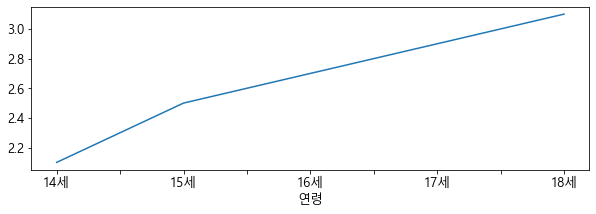

In [24]:
df_merge['비율'].plot(kind='line', rot=0, figsize=(10, 3))
plt.show()

### (4) 연령별 소년 범죄자 수와 소년 범죄자 비율

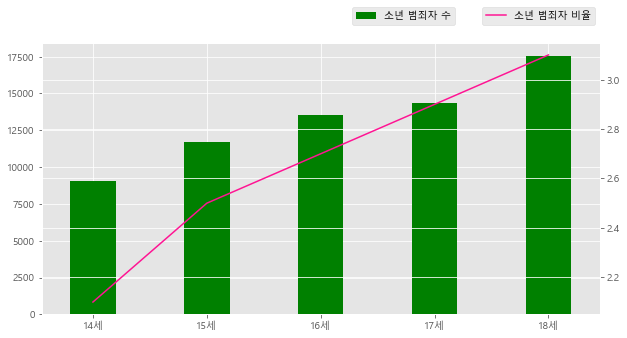

In [25]:
plt.style.use('ggplot')
# plt.style.use('dark_background')

fig, ax1 = plt.subplots()
#plt.title('연령별 소년 범죄자 수와 소년 범죄자 비율')
ax2 = ax1.twinx()
gr1 = df1_sum.iloc[0][2:]
gr2 = df_merge['비율']
gr1.plot(kind='bar', ax=ax1, color='green', label='소년 범죄자 수', rot=0, figsize=(10, 5), width=0.4)
gr2.plot(kind='line', ax=ax2, color='deeppink', label='소년 범죄자 비율')
ax1.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
ax2.legend(bbox_to_anchor =(1.0, 1.15), ncol = 2)

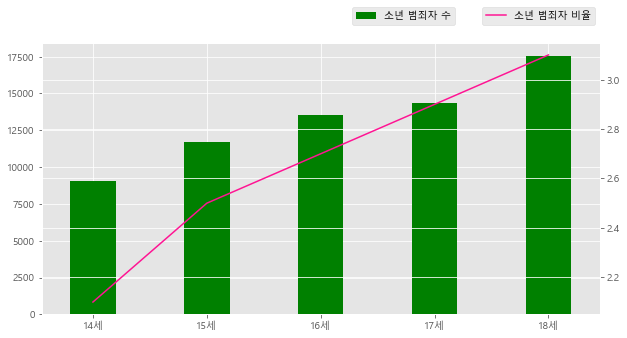

In [26]:
plt.style.use('ggplot')
# plt.style.use('dark_background')

fig, ax1 = plt.subplots()
#plt.title('연령별 소년 범죄자 수와 소년 범죄자 비율')
ax2 = ax1.twinx()
gr1 = df1_sum.iloc[0][2:]
gr2 = df_merge['비율']
gr1.plot(kind='bar', ax=ax1, color='green', label='소년 범죄자 수', rot=0, figsize=(10, 5), width=0.4)
gr2.plot(kind='line', ax=ax2, color='deeppink', label='소년 범죄자 비율')
ax1.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
ax2.legend(bbox_to_anchor =(1.0, 1.15), ncol = 2)

### 2. 연령별 가장 많이 저지른 범죄 유형

In [27]:
# '계'가 들어 있지 않은 행만 추출
df1 = df1[~df1.범죄유형.str.contains('계')].copy()

# '범죄유형'를 인덱스로 설정
df1.set_index("범죄유형", inplace = True)
df1.head()

,소계,14세,15세,16세,17세,18세
범죄유형,,,,,,
배임,1.0,0.0,0.0,0.0,0.0,1.0
사기,8088.0,609.0,1023.0,1762.0,2044.0,2650.0
손괴,1124.0,138.0,169.0,219.0,218.0,380.0
장물,175.0,29.0,28.0,48.0,36.0,34.0
절도,17141.0,4175.0,4390.0,3885.0,2631.0,2060.0


### (1) 14세 (절도>폭행>상해>사기>성폭력)
- 재산범죄: 절도, 사기 (52.8%)
- 강력범죄(폭력): 폭행, 상해 (19.6%)

In [28]:
age14 = df1[['14세']]
age14.head()

,14세
범죄유형,
배임,0.0
사기,609.0
손괴,138.0
장물,29.0
절도,4175.0


In [29]:
# 내림차순 정렬
age14_top5 = age14.sort_values('14세',ascending=False).head()
age14_top5

,14세
범죄유형,
절도,4175.0
폭행,1110.0
상해,664.0
사기,609.0
성폭력,416.0


In [30]:
sum14 = age14['14세'].sum()

# '기타' 행 추가
age14_top5.loc['기타'] = sum14 - age14_top5['14세'].sum()
age14_top5

,14세
범죄유형,
절도,4175.0
폭행,1110.0
상해,664.0
사기,609.0
성폭력,416.0
기타,2079.0


In [31]:
ratio14 = []

for i in age14_top5['14세']:
    ratio14.append(i/sum14*100)

print(ratio14)

[46.11730917927759, 12.26112890754446, 7.334585220368939, 6.72705180603115, 4.5951618248094555, 22.96476306196841]


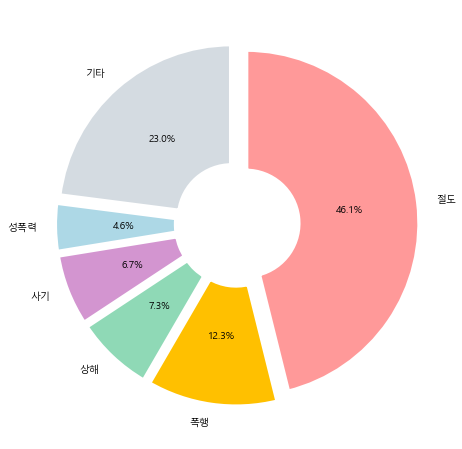

In [32]:
labels14 = age14_top5.index.tolist() # 인덱스 리스트로 추출

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1'] # 다홍, 노랑, 민트, 연보라, 하늘색, 회색
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(ratio14, labels=labels14, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

### (2) 15세 (절도>폭행>사기>상해>도로교통법(무면허운전))
- 재산범죄: 절도, 사기 (46.1%)
- 강력범죄(폭력): 폭행, 상해 (21.9%)

In [33]:
age15 = df1[['15세']]
age15.head()

,15세
범죄유형,
배임,0.0
사기,1023.0
손괴,169.0
장물,28.0
절도,4390.0


In [34]:
# 내림차순 정렬
age15_top5 = age15.sort_values('15세',ascending=False).head()
age15_top5

,15세
범죄유형,
절도,4390.0
폭행,1654.0
사기,1023.0
상해,917.0
도로교통법(무면허운전),673.0


In [35]:
sum15 = age15['15세'].sum()

# '기타' 행 추가
age15_top5.loc['기타'] = sum15 - age15_top5['15세'].sum()
age15_top5

,15세
범죄유형,
절도,4390.0
폭행,1654.0
사기,1023.0
상해,917.0
도로교통법(무면허운전),673.0
기타,3073.0


In [36]:
ratio15 = []

for i in age15_top5['15세']:
    ratio15.append(i/sum15*100)

print(ratio15)

[37.42540494458653, 14.100596760443306, 8.721227621483376, 7.817561807331629, 5.737425404944586, 26.197783461210573]


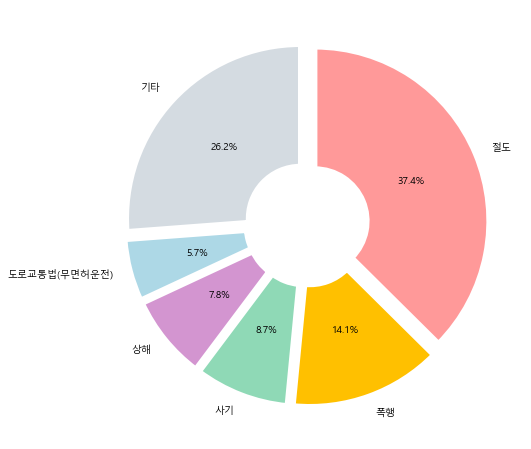

In [37]:
labels15 = age15_top5.index.tolist()

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1'] # 다홍, 노랑, 민트, 연보라, 하늘색, 회색
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(ratio15, labels=labels15, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

### (3) 16세 (절도>사기>폭행>도로교통법(무면허운전)>상해)
- 재산범죄: 절도, 사기 (41.7%)
- 강력범죄(폭력): 폭행, 상해 (19.1%)

In [38]:
age16 = df1[['16세']]
age16.head()

,16세
범죄유형,
배임,0.0
사기,1762.0
손괴,219.0
장물,48.0
절도,3885.0


In [39]:
# 내림차순 정렬
age16_top5 = age16.sort_values('16세',ascending=False).head()
age16_top5

,16세
범죄유형,
절도,3885.0
사기,1762.0
폭행,1711.0
도로교통법(무면허운전),919.0
상해,880.0


In [40]:
sum16 = age16['16세'].sum()

# '기타' 행 추가
age16_top5.loc['기타'] = sum16 - age16_top5['16세'].sum()
age16_top5

,16세
범죄유형,
절도,3885.0
사기,1762.0
폭행,1711.0
도로교통법(무면허운전),919.0
상해,880.0
기타,4391.0


In [41]:
ratio16 = []

for i in age16_top5['16세']:
    ratio16.append(i/sum16*100)

print(ratio16)

[28.675819309123117, 13.005609684086211, 12.6291703572483, 6.783289046353705, 6.495423678771775, 32.410687924416884]


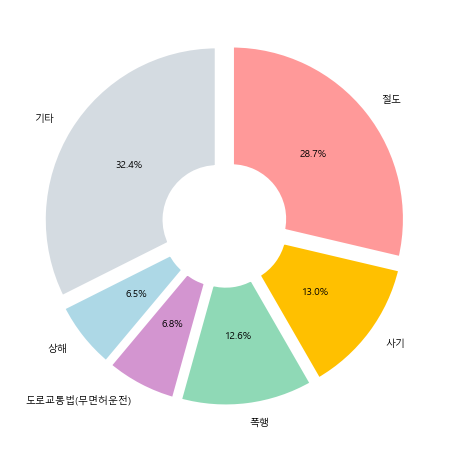

In [42]:
labels16 = age16_top5.index.tolist()

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1'] # 다홍, 노랑, 민트, 연보라, 하늘색, 회색
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(ratio16, labels=labels16, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

### (4) 17세 (절도>폭행>사기>상해>도로교통법(무면허운전))
- 재산범죄: 절도, 사기 (32.6%)
- 강력범죄(폭력): 폭행, 상해 (22.2%)

In [43]:
age17 = df1[['17세']]
age17.head()

,17세
범죄유형,
배임,0.0
사기,2044.0
손괴,218.0
장물,36.0
절도,2631.0


In [44]:
# 내림차순 정렬
age17_top5 = age17.sort_values('17세',ascending=False).head()
age17_top5

,17세
범죄유형,
절도,2631.0
폭행,2074.0
사기,2044.0
상해,1110.0
도로교통법(무면허운전),809.0


In [45]:
sum17 = age17['17세'].sum()

# '기타' 행 추가
age17_top5.loc['기타'] = sum17 - age17_top5['17세'].sum()
age17_top5

,17세
범죄유형,
절도,2631.0
폭행,2074.0
사기,2044.0
상해,1110.0
도로교통법(무면허운전),809.0
기타,5670.0


In [46]:
ratio17 = []

for i in age17_top5['17세']:
    ratio17.append(i/sum17*100)

print(ratio17)

[18.349839587111173, 14.465057888129445, 14.255823685311759, 7.741665504254429, 5.6423490026503, 39.54526433254289]


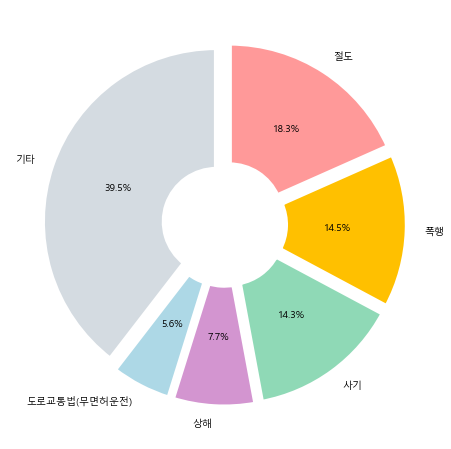

In [47]:
labels17 = age17_top5.index.tolist()

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1'] # 다홍, 노랑, 민트, 연보라, 하늘색, 회색
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(ratio17, labels=labels17, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

### (5) 18세 (폭행>사기>절도>상해>교통사고처리특례법)
- 강력범죄(폭력): 폭행, 상해 (28.5%)
- 재산범죄: 사기, 절도 (26.8%)

In [48]:
age18 = df1[['18세']]
age18.head()

,18세
범죄유형,
배임,1.0
사기,2650.0
손괴,380.0
장물,34.0
절도,2060.0


In [49]:
# 내림차순 정렬
age18_top5 = age18.sort_values('18세',ascending=False).head()
age18_top5

,18세
범죄유형,
폭행,3590.0
사기,2650.0
절도,2060.0
상해,1424.0
교통사고처리특례법,1035.0


In [50]:
sum18 = age18['18세'].sum()

# '기타' 행 추가
age18_top5.loc['기타'] = sum18 - age18_top5['18세'].sum()
age18_top5

,18세
범죄유형,
폭행,3590.0
사기,2650.0
절도,2060.0
상해,1424.0
교통사고처리특례법,1035.0
기타,6819.0


In [51]:
ratio18 = []

for i in age18_top5['18세']:
    ratio18.append(i/sum18*100)

print(ratio18)

[20.42325634315622, 15.075662760268518, 11.719194447604961, 8.101035385140516, 5.888041870519968, 38.79280919330982]


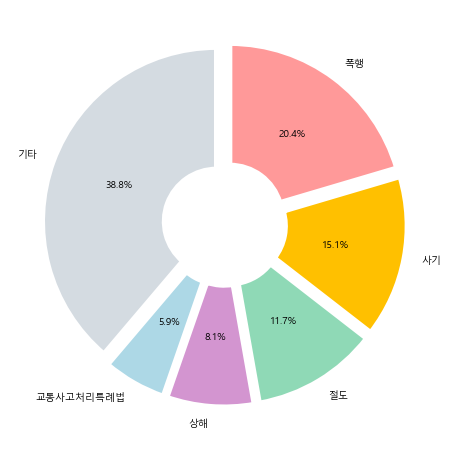

In [52]:
labels18 = age18_top5.index.tolist()

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1'] # 다홍, 노랑, 민트, 연보라, 하늘색, 회색
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(ratio18, labels=labels18, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

### 3. 2006년~2019년 연령별 범죄자 데이터 추가 분석

In [53]:
df3.head()

,범죄별,범행연령별,항목,단위,2006 년,2007 년,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년
0,합계,계,범죄자 연령,명,1932729,1989862,2472897,2519237,1954331,1907641,2117737,2147250,1879548,1948966,2020196,1861796.0,1749459,1754808
1,합계,소년,범죄자 연령,명,69211,88104,134992,113022,89776,83068,107490,91633,77594,71035,76000,72759.0,66142,66247
2,합계,14세미만,범죄자 연령,명,400,578,3800,1989,445,360,856,471,37,64,84,93.0,NaN,NaN
3,합계,14세,범죄자 연령,명,8484,10884,16638,15431,8870,5189,12978,11338,9712,7,7530,7703.0,8321,9053
4,합계,15세,범죄자 연령,명,13400,18081,26385,24657,19280,17084,21009,16645,14041,14387,13789,12376.0,11595,11730


In [54]:
df3.tail()

,범죄별,범행연령별,항목,단위,2006 년,2007 년,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년
6593,기타특별법,56~60세,범죄자 연령,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4141,5100,5741,7458.0,7173,8408
6594,기타특별법,51~60세,범죄자 연령,명,3946,9139,13239,17479,16361,21060,23808,27516,NaN,NaN,NaN,NaN,NaN,NaN
6595,기타특별법,61~70세,범죄자 연령,명,1505,2467,3828,4592,4052,5082,5740,7285,3011,3681,4363,5779.0,6132,7729
6596,기타특별법,71세이상,범죄자 연령,명,358,585,846,1151,960,1186,1409,1738,781,1053,1092,1458.0,1694,2390
6597,기타특별법,미상,범죄자 연령,명,7784,8273,11594,12956,5130,6157,6302,6299,679,1329,1343,2779.0,1853,962


In [55]:
# 필요없는 컬럼 삭제
df3 = df3.drop(['항목', '단위'], axis=1).copy()
df3.head()

,범죄별,범행연령별,2006 년,2007 년,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년
0,합계,계,1932729,1989862,2472897,2519237,1954331,1907641,2117737,2147250,1879548,1948966,2020196,1861796.0,1749459,1754808
1,합계,소년,69211,88104,134992,113022,89776,83068,107490,91633,77594,71035,76000,72759.0,66142,66247
2,합계,14세미만,400,578,3800,1989,445,360,856,471,37,64,84,93.0,NaN,NaN
3,합계,14세,8484,10884,16638,15431,8870,5189,12978,11338,9712,7,7530,7703.0,8321,9053
4,합계,15세,13400,18081,26385,24657,19280,17084,21009,16645,14041,14387,13789,12376.0,11595,11730


1. 2008년 6월 22일 시행된 개정소년법에 따라 소년범의 나이 기준이 19세에서 18세로 변경
2. 따라서 소년범은 2009년 ~ 2019년 사이의 14세 ~ 18세 추이를 살펴보기로 함

### (1) 소년범죄자 수와 비율 추이

In [56]:
# ~18세, ~ 2019년 컬럼 추출
df3_y_all = df3.iloc[0:8, 1:].copy()

# 컬럼명 변경
df3_y_all.rename(columns={'범행연령별':'연령'}, inplace=True)

# 연령을 인덱스로 설정
df3_y_all.set_index('연령', inplace = True)

# 2009년~2017년 컬럼 추출
df3_y_all = df3_y_all.iloc[:, 3:].copy()
df3_y_all

,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년
연령,,,,,,,,,,,
계,2519237,1954331,1907641,2117737,2147250,1879548,1948966,2020196,1861796.0,1749459,1754808
소년,113022,89776,83068,107490,91633,77594,71035,76000,72759.0,66142,66247
14세미만,1989,445,360,856,471,37,64,84,93.0,NaN,NaN
14세,15431,8870,5189,12978,11338,9712,7,7530,7703.0,8321,9053
15세,24657,19280,17084,21009,16645,14041,14387,13789,12376.0,11595,11730
16세,26153,21611,21815,26080,20463,16940,17624,17589,16391.0,13306,13548
17세,23307,19637,19936,24140,21208,17517,18231,17607,17358.0,15513,14338
18세,21485,19933,18684,22427,21508,19347,20722,19401,18838.0,17407,17578


In [57]:
# 데이터 타입 변경
df3_y_all = df3_y_all.apply(pd.to_numeric)

In [58]:
df3_y_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 계 to 18세
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2009 년  8 non-null      int64  
 1   2010 년  8 non-null      int64  
 2   2011 년  8 non-null      int64  
 3   2012 년  8 non-null      int64  
 4   2013 년  8 non-null      int64  
 5   2014 년  8 non-null      int64  
 6   2015 년  8 non-null      int64  
 7   2016 년  8 non-null      int64  
 8   2017 년  8 non-null      float64
 9   2018 년  7 non-null      float64
 10  2019 년  7 non-null      float64
dtypes: float64(3), int64(8)
memory usage: 768.0+ bytes


In [59]:
# 행렬 전치
df3_y_all = df3_y_all.T.copy()
df3_y_all

연령,계,소년,14세미만,14세,15세,16세,17세,18세
2009 년,2519237.0,113022.0,1989.0,15431.0,24657.0,26153.0,23307.0,21485.0
2010 년,1954331.0,89776.0,445.0,8870.0,19280.0,21611.0,19637.0,19933.0
2011 년,1907641.0,83068.0,360.0,5189.0,17084.0,21815.0,19936.0,18684.0
2012 년,2117737.0,107490.0,856.0,12978.0,21009.0,26080.0,24140.0,22427.0
2013 년,2147250.0,91633.0,471.0,11338.0,16645.0,20463.0,21208.0,21508.0
2014 년,1879548.0,77594.0,37.0,9712.0,14041.0,16940.0,17517.0,19347.0
2015 년,1948966.0,71035.0,64.0,7.0,14387.0,17624.0,18231.0,20722.0
2016 년,2020196.0,76000.0,84.0,7530.0,13789.0,17589.0,17607.0,19401.0
2017 년,1861796.0,72759.0,93.0,7703.0,12376.0,16391.0,17358.0,18838.0
2018 년,1749459.0,66142.0,NaN,8321.0,11595.0,13306.0,15513.0,17407.0


In [60]:
df3_y_all.rename_axis('연도')

연령,계,소년,14세미만,14세,15세,16세,17세,18세
연도,,,,,,,,
2009 년,2519237.0,113022.0,1989.0,15431.0,24657.0,26153.0,23307.0,21485.0
2010 년,1954331.0,89776.0,445.0,8870.0,19280.0,21611.0,19637.0,19933.0
2011 년,1907641.0,83068.0,360.0,5189.0,17084.0,21815.0,19936.0,18684.0
2012 년,2117737.0,107490.0,856.0,12978.0,21009.0,26080.0,24140.0,22427.0
2013 년,2147250.0,91633.0,471.0,11338.0,16645.0,20463.0,21208.0,21508.0
2014 년,1879548.0,77594.0,37.0,9712.0,14041.0,16940.0,17517.0,19347.0
2015 년,1948966.0,71035.0,64.0,7.0,14387.0,17624.0,18231.0,20722.0
2016 년,2020196.0,76000.0,84.0,7530.0,13789.0,17589.0,17607.0,19401.0
2017 년,1861796.0,72759.0,93.0,7703.0,12376.0,16391.0,17358.0,18838.0


In [61]:
# 전체 대비 소년범 비율 추가
df3_y_all.insert(2,'소년범 비율',df3_y_all['소년']/df3_y_all['계']*100) 
df3_y_all

연령,계,소년,소년범 비율,14세미만,14세,15세,16세,17세,18세
2009 년,2519237.0,113022.0,4.486358,1989.0,15431.0,24657.0,26153.0,23307.0,21485.0
2010 년,1954331.0,89776.0,4.593695,445.0,8870.0,19280.0,21611.0,19637.0,19933.0
2011 년,1907641.0,83068.0,4.354488,360.0,5189.0,17084.0,21815.0,19936.0,18684.0
2012 년,2117737.0,107490.0,5.075701,856.0,12978.0,21009.0,26080.0,24140.0,22427.0
2013 년,2147250.0,91633.0,4.267458,471.0,11338.0,16645.0,20463.0,21208.0,21508.0
2014 년,1879548.0,77594.0,4.128333,37.0,9712.0,14041.0,16940.0,17517.0,19347.0
2015 년,1948966.0,71035.0,3.644753,64.0,7.0,14387.0,17624.0,18231.0,20722.0
2016 년,2020196.0,76000.0,3.762011,84.0,7530.0,13789.0,17589.0,17607.0,19401.0
2017 년,1861796.0,72759.0,3.908001,93.0,7703.0,12376.0,16391.0,17358.0,18838.0
2018 년,1749459.0,66142.0,3.780712,NaN,8321.0,11595.0,13306.0,15513.0,17407.0


In [62]:
df3_y_all

연령,계,소년,소년범 비율,14세미만,14세,15세,16세,17세,18세
2009 년,2519237.0,113022.0,4.486358,1989.0,15431.0,24657.0,26153.0,23307.0,21485.0
2010 년,1954331.0,89776.0,4.593695,445.0,8870.0,19280.0,21611.0,19637.0,19933.0
2011 년,1907641.0,83068.0,4.354488,360.0,5189.0,17084.0,21815.0,19936.0,18684.0
2012 년,2117737.0,107490.0,5.075701,856.0,12978.0,21009.0,26080.0,24140.0,22427.0
2013 년,2147250.0,91633.0,4.267458,471.0,11338.0,16645.0,20463.0,21208.0,21508.0
2014 년,1879548.0,77594.0,4.128333,37.0,9712.0,14041.0,16940.0,17517.0,19347.0
2015 년,1948966.0,71035.0,3.644753,64.0,7.0,14387.0,17624.0,18231.0,20722.0
2016 년,2020196.0,76000.0,3.762011,84.0,7530.0,13789.0,17589.0,17607.0,19401.0
2017 년,1861796.0,72759.0,3.908001,93.0,7703.0,12376.0,16391.0,17358.0,18838.0
2018 년,1749459.0,66142.0,3.780712,NaN,8321.0,11595.0,13306.0,15513.0,17407.0


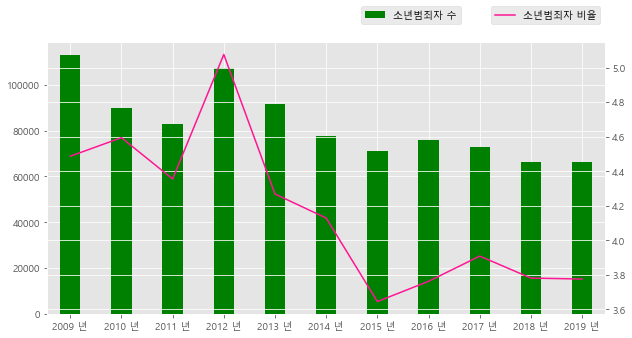

In [63]:
plt.style.use('ggplot')

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

gr1 = df3_y_all['소년'] # 소년범죄자 수 추이
gr2 = df3_y_all['소년범 비율'] # 전체 대비 소년범 비율 추이

       
gr1.plot(kind='bar', ax=ax1, color='green', label='소년범죄자 수', rot=0, figsize=(10, 5), width=0.4)
gr2.plot(kind='line', ax=ax2, color='deeppink', label='소년범죄자 비율')


plt.legend()
ax1.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
ax2.legend(bbox_to_anchor =(1.0, 1.15), ncol = 2)

### (2) 촉법소년 수와 비율 추이

<촉법소년 및 형사미성년자의 적정 연령에 관한 연구(권다희) 中>  

촉법소년의 경우, 소년범죄자 처리 규정에 따라 검찰이 아닌 법원 소년부에 송치하도록 함으로써 피의자원표를 작성하지 않는 것이 원칙이다. 따라서 입건을 기준으로 집계하는 경찰 및 검찰의 통계에서는 누락될 가능성이 크다. 그러나 실제로는 이마저도 적용의 일관성이 없이 운영되어 현재 매년 경찰청, 검찰청에서 발간되는 공식통계 수치만으로는 14세 미만의 촉법소년 수를 정확하게 파악할 수 없다.   

그러나 현재 소년법원에 소년보호사건을 접수할 수 있는 송치관서인 학교·사회복리시설·보호관찰소의 장, 법원, 검찰, 경찰 등의 기관 중 경찰송치 건수와 비율은 대략적인 촉법소년의 규모를 알 수 있는 지표로 해석할 수 있다. 물론, 암수범죄와 경찰단계에서의 훈방 등은 제외된다.

=> 따라서 검찰청 통계가 아닌 대법원 사법연감 기준 소년보호사건 경찰송치 건수를 촉법소년 수로 파악하여 분석하기로 한다.

In [64]:
df3.head()

,범죄별,범행연령별,2006 년,2007 년,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년
0,합계,계,1932729,1989862,2472897,2519237,1954331,1907641,2117737,2147250,1879548,1948966,2020196,1861796.0,1749459,1754808
1,합계,소년,69211,88104,134992,113022,89776,83068,107490,91633,77594,71035,76000,72759.0,66142,66247
2,합계,14세미만,400,578,3800,1989,445,360,856,471,37,64,84,93.0,NaN,NaN
3,합계,14세,8484,10884,16638,15431,8870,5189,12978,11338,9712,7,7530,7703.0,8321,9053
4,합계,15세,13400,18081,26385,24657,19280,17084,21009,16645,14041,14387,13789,12376.0,11595,11730


In [65]:
# ~소년 행, ~ 2019년 컬럼 추출
df3_under14 = df3.iloc[0:2, 1:].copy()

# 컬럼명 변경
df3_under14.rename(columns={'범행연령별':'연령'}, inplace=True)

# 연령을 인덱스로 설정
#df3_under14.set_index('연령', inplace = True)

# 2006년~2009년 삭제
df3_under14 = df3_under14.drop(['2006 년', '2007 년', '2008 년', '2009 년'], axis=1).copy()

df3_under14

,연령,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년
0,계,1954331,1907641,2117737,2147250,1879548,1948966,2020196,1861796.0,1749459,1754808
1,소년,89776,83068,107490,91633,77594,71035,76000,72759.0,66142,66247


In [66]:
# 행렬 전치
df3_under14 = df3_under14.T.copy()
df3_under14

,0,1
연령,계,소년
2010 년,1954331,89776
2011 년,1907641,83068
2012 년,2117737,107490
2013 년,2147250,91633
2014 년,1879548,77594
2015 년,1948966,71035
2016 년,2020196,76000
2017 년,1861796.0,72759.0
2018 년,1749459,66142


In [67]:
# 필요없는 행 삭제
df3_under14 = df3_under14.drop('연령')

In [68]:
df3_under14.columns = ['계', '소년']
df3_under14

,계,소년
2010 년,1954331,89776
2011 년,1907641,83068
2012 년,2117737,107490
2013 년,2147250,91633
2014 년,1879548,77594
2015 년,1948966,71035
2016 년,2020196,76000
2017 년,1861796.0,72759.0
2018 년,1749459,66142
2019 년,1754808,66247


In [69]:
df5

,구분,합계,법원송치,검사송치,경찰서장송치,타소년부에서 이송등,소년법 제4조 제3항에 의한 통고
0,2010,44200,2212,31715,9213,1026,34
1,2011,46497,2417,32803,9401,1818,8
2,2012,53536,2848,36133,12799,1588,168
3,2013,43035,2695,29284,9500,1368,188
4,2014,34165,1610,24110,7104,1146,195
5,2015,34075,1494,24527,6756,989,309
6,2016,33738,1357,24319,6788,915,359
7,2017,34110,1124,24014,7743,876,353
8,2018,33301,954,22578,8335,1027,407
9,2019,36576,876,23511,10460,1285,444


In [70]:
# '구분', '경찰서장 송치' 컬럼만 추출
df5 = df5.iloc[:, [0, 4]].copy()

# 컬럼명 변경
df5.columns = ['연도', '촉법소년 수']

df5

,연도,촉법소년 수
0,2010,9213
1,2011,9401
2,2012,12799
3,2013,9500
4,2014,7104
5,2015,6756
6,2016,6788
7,2017,7743
8,2018,8335
9,2019,10460


In [71]:
# 인덱스 초기화
df3_under14.reset_index(drop=False, inplace=True)

# 데이터프레임 붙이기
df_under14_c = pd.concat([df3_under14, df5], axis=1)
df_under14_c

,index,계,소년,연도,촉법소년 수
0,2010 년,1954331,89776,2010,9213
1,2011 년,1907641,83068,2011,9401
2,2012 년,2117737,107490,2012,12799
3,2013 년,2147250,91633,2013,9500
4,2014 년,1879548,77594,2014,7104
5,2015 년,1948966,71035,2015,6756
6,2016 년,2020196,76000,2016,6788
7,2017 년,1861796.0,72759.0,2017,7743
8,2018 년,1749459,66142,2018,8335
9,2019 년,1754808,66247,2019,10460


In [72]:
# 필요없는 컬럼 삭제
df_under14_c = df_under14_c.drop(['계', '연도'], axis=1).copy()

# index를 인덱스로 설정
df_under14_c.set_index('index', inplace = True)

# 컬럼명 변경
df_under14_c.columns = ['소년범 수', '촉법소년 수']

# index name 변경
df_under14_c.index.name = '연도'

df_under14_c

,소년범 수,촉법소년 수
연도,,
2010 년,89776,9213
2011 년,83068,9401
2012 년,107490,12799
2013 년,91633,9500
2014 년,77594,7104
2015 년,71035,6756
2016 년,76000,6788
2017 년,72759.0,7743
2018 년,66142,8335


In [73]:
# 데이터 타입 변경
df_under14_c = df_under14_c.apply(pd.to_numeric)

In [74]:
# 소년범 대비 촉법소년 비율 추가
df_under14_c['촉법소년 비율'] = df_under14_c['촉법소년 수']/df_under14_c['소년범 수']*100
df_under14_c

,소년범 수,촉법소년 수,촉법소년 비율
연도,,,
2010 년,89776.0,9213,10.262208
2011 년,83068.0,9401,11.317234
2012 년,107490.0,12799,11.907154
2013 년,91633.0,9500,10.367444
2014 년,77594.0,7104,9.155347
2015 년,71035.0,6756,9.510805
2016 년,76000.0,6788,8.931579
2017 년,72759.0,7743,10.641982
2018 년,66142.0,8335,12.601675


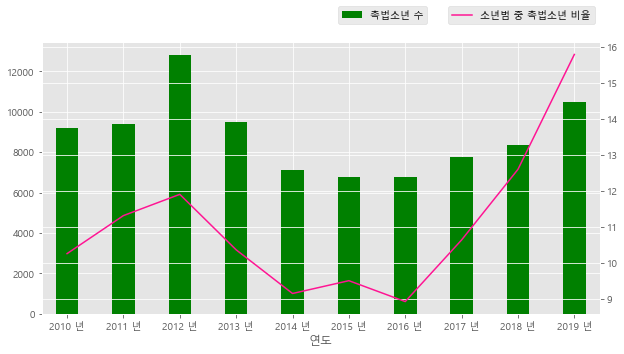

In [75]:
plt.style.use('ggplot')

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

gr1 = df_under14_c['촉법소년 수'] # 촉법소년 수 추이
gr2 = df_under14_c['촉법소년 비율'] # 소년범 중 촉법소년 비율 추이

       
gr1.plot(kind='bar', ax=ax1, color='green', label='촉법소년 수', rot=0, figsize=(10, 5), width=0.4)
gr2.plot(kind='line', ax=ax2, color='deeppink', label='소년범 중 촉법소년 비율')


plt.legend()
ax1.legend(bbox_to_anchor =(0.7, 1.15), ncol = 2)
ax2.legend(bbox_to_anchor =(1.0, 1.15), ncol = 2)

촉법소년 수는 2010년 9,213명에서 2012년 12,799명으로 증가한 후 2015년 감소하였으나, 이후 큰폭으로 증가하여 2019년에는 다시 1만 명을 넘어섰다. 소년범 중 촉법소년의 비율 또한 2010년 약 10%에서 증감을 반복하며 2016년 약 9%까지 감소하였으나, 이후 대폭 상승하여 2019년 약 16%를 차지했다. 

### (3) 2010~2019년 10세 ~ 13세 인구수 대비 촉법소년 비율 추이

In [76]:
df4

,시점,10세,11세,12세,13세
0,2010,640166,620740,641207,673228
1,2011,560042,640027,620650,640950
2,2012,495216,559908,639852,620407
3,2013,493745,495256,559931,639858
4,2014,474187,493804,495268,559938
5,2015,436313,474284,493916,495316
6,2016,449851,436439,474372,493970
7,2017,496041,449954,436496,474366
8,2018,468897,496074,449936,436420
9,2019,448401,469014,496146,449979


In [77]:
# 시점을 인덱스로 설정
df4.set_index('시점', inplace = True)

# 데이터 타입 변경
df4 = df4.apply(pd.to_numeric)

df4.head()

,10세,11세,12세,13세
시점,,,,
2010,640166,620740,641207,673228
2011,560042,640027,620650,640950
2012,495216,559908,639852,620407
2013,493745,495256,559931,639858
2014,474187,493804,495268,559938


In [78]:
df4.iloc[:, :].sum(axis=1)

시점
2010    2575341
2011    2461669
2012    2315383
2013    2188790
2014    2023197
2015    1899829
2016    1854632
2017    1856857
2018    1851327
2019    1863540
dtype: int64

In [79]:
# 전체 대비 소년범 비율 추가
df4['10세~13세'] = df4.iloc[:, :].sum(axis=1)
df4

,10세,11세,12세,13세,10세~13세
시점,,,,,
2010,640166,620740,641207,673228,2575341
2011,560042,640027,620650,640950,2461669
2012,495216,559908,639852,620407,2315383
2013,493745,495256,559931,639858,2188790
2014,474187,493804,495268,559938,2023197
2015,436313,474284,493916,495316,1899829
2016,449851,436439,474372,493970,1854632
2017,496041,449954,436496,474366,1856857
2018,468897,496074,449936,436420,1851327


In [80]:
# 10~13세 컬럼만 추출
df4_under14 = df4.loc[:, '10세~13세'].copy()
df4_under14 = df4_under14.to_frame()
df4_under14

,10세~13세
시점,
2010,2575341
2011,2461669
2012,2315383
2013,2188790
2014,2023197
2015,1899829
2016,1854632
2017,1856857
2018,1851327


In [81]:
df5

,연도,촉법소년 수
0,2010,9213
1,2011,9401
2,2012,12799
3,2013,9500
4,2014,7104
5,2015,6756
6,2016,6788
7,2017,7743
8,2018,8335
9,2019,10460


In [82]:
# 인덱스 초기화
df4_under14.reset_index(drop=False, inplace=True)

# 데이터프레임 붙이기
df4_concat = pd.concat([df4_under14, df5], axis=1)
df4_concat

,시점,10세~13세,연도,촉법소년 수
0,2010,2575341,2010,9213
1,2011,2461669,2011,9401
2,2012,2315383,2012,12799
3,2013,2188790,2013,9500
4,2014,2023197,2014,7104
5,2015,1899829,2015,6756
6,2016,1854632,2016,6788
7,2017,1856857,2017,7743
8,2018,1851327,2018,8335
9,2019,1863540,2019,10460


In [83]:
# 필요없는 컬럼 삭제
df4_concat = df4_concat.drop(['연도'], axis=1).copy()

# 시점을 인덱스로 설정
df4_concat.set_index('시점', inplace = True)

df4_concat

,10세~13세,촉법소년 수
시점,,
2010,2575341,9213
2011,2461669,9401
2012,2315383,12799
2013,2188790,9500
2014,2023197,7104
2015,1899829,6756
2016,1854632,6788
2017,1856857,7743
2018,1851327,8335


In [84]:
# 촉법소년 비율
df4_concat['촉법소년 비율'] = df4_concat['촉법소년 수']/df4_concat['10세~13세']*100
df4_concat

,10세~13세,촉법소년 수,촉법소년 비율
시점,,,
2010,2575341,9213,0.357739
2011,2461669,9401,0.381895
2012,2315383,12799,0.552781
2013,2188790,9500,0.434030
2014,2023197,7104,0.351127
2015,1899829,6756,0.355611
2016,1854632,6788,0.366003
2017,1856857,7743,0.416995
2018,1851327,8335,0.450218


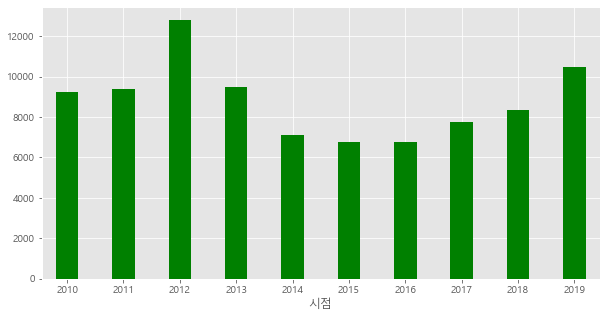

In [85]:
# 촉법소년 수 추이
df4_concat['촉법소년 수'].plot(kind='bar', color='green', label='촉법소년 수', rot=0, figsize=(10, 5), width=0.4)
plt.show()

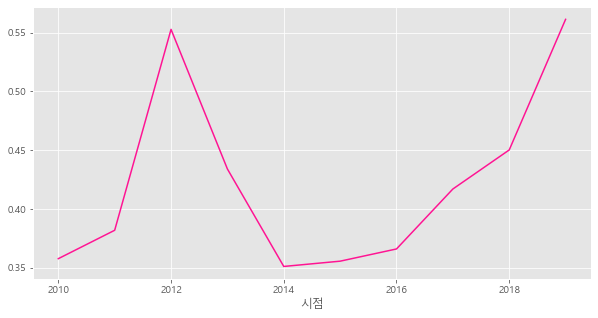

In [86]:
# 14세미만 인구 수 대비 촉법소년 비율 추이

df4_concat['촉법소년 비율'].plot(kind='line', color='deeppink', label='촉법소년 비율', rot=0, figsize=(10, 5))
plt.show()

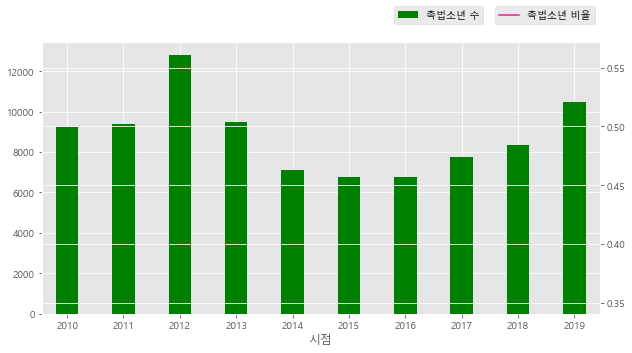

In [87]:
plt.style.use('ggplot')

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

gr3 = df4_concat['촉법소년 수'] # 촉법소년 수 추이
gr4 = df4_concat['촉법소년 비율'] # 10세~13세 인구 수 대비 촉법소년 비율 추이

       
gr3.plot(kind='bar', ax=ax1, color='green', label='촉법소년 수', rot=0, figsize=(10, 5), width=0.4)
gr4.plot(kind='line', ax=ax2, color='deeppink', label='촉법소년 비율')



ax1.legend(bbox_to_anchor =(0.8, 1.15), ncol = 2)
ax2.legend(bbox_to_anchor =(1.0, 1.15), ncol = 2)

In [88]:
# 폰트 크기 설정
plt.rcParams["font.size"] = 11.5
plt.rc('xtick', labelsize=9)    # fontsize of the tick labels
plt.rc('ytick', labelsize=9)    # fontsize of the tick labels

plt.rcParams['xtick.color'] = '#5A5A59'
plt.rcParams['ytick.color'] = '#5A5A59'

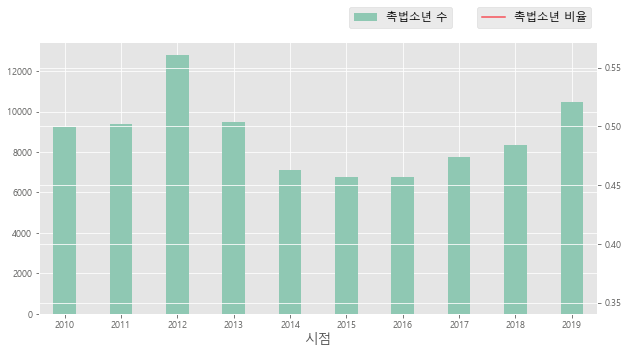

In [89]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

gr3 = df4_concat['촉법소년 수']
gr4 = df4_concat['촉법소년 비율']
gr3.plot(kind='bar', ax=ax1, color='#8FC8B3', label='촉법소년 수', rot=0, figsize=(10, 5), width=0.4)
gr4.plot(kind='line', ax=ax2, color='#F65058FF', label='촉법소년 비율')
ax1.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
ax2.legend(bbox_to_anchor =(1.0, 1.15), ncol = 2)
